# USER ENGAGEMENT ANALYSIS

In [12]:
import sys
sys.path.insert(0,'../scripts')

In [13]:
#importing important modules
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
pd.set_option('max_column', None)
pd.set_option('display.float_format', '{:.2f}'.format)
%matplotlib inline
import seaborn as sns

In [14]:
#importing local Scripts
from load_data import loader
from data_info import DataInfo
from clean_Telecom import DataCleaner
from data_manipulation import DataManipulator
from Result_picker import picker
from graph import draw

In [15]:
res = picker()

In [16]:
df= pd.read_csv('../data/teleCo_clean_data.csv')
df.head()

,Unnamed: 0,Bearer Id,Start,Start sec,End,End sec,Dur. (hr),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (sec),Activity Duration UL (sec),Total Duration (hr),Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes),start_date,start_time,end_date,end_time
0,0,13114483460844900352,2019-04-04 12:01:18,0.77,2019-04-25 14:35:31,0.66,0.51,208201448079117.00,33664962239.00,35521209507511.00,9164566995485190,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37.62,38.79,506.57,Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,1.55,0.02,1.63,1.27,3.56,0.14,15.85,2.50,8.20,9.66,278.08,14.34,171.74,8.81,36.75,308.88,2019-04-04,12:01:18,2019-04-25,14:35:31
1,1,13114483482878900224,2019-04-09 13:04:04,0.23,2019-04-25 08:15:48,0.61,0.38,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.17,3.56,379.20,Samsung,Samsung Galaxy J5 (Sm-J530),971.00,1022.00,1.93,0.01,3.49,0.92,0.63,0.31,20.25,19.11,18.34,17.23,608.75,1.17,526.90,15.06,53.80,653.38,2019-04-09,13:04:04,2019-04-25,08:15:48
2,2,13114483484080500736,2019-04-09 17:42:11,0.00,2019-04-25 11:58:13,0.65,0.38,208200314458056.00,33760627129.00,35281510359387.00,D42335A,45.00,5.00,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,378.27,Samsung,Samsung Galaxy A8 (2018),751.00,695.00,1.68,0.04,8.54,1.69,2.69,0.67,19.73,14.70,17.59,6.16,229.58,0.40,410.69,4.22,27.88,279.81,2019-04-09,17:42:11,2019-04-25,11:58:13
3,3,13114483485442799616,2019-04-10 00:31:25,0.49,2019-04-25 07:36:35,0.17,0.37,208201402342131.00,33750343200.00,35356610164913.00,T21824A,45.00,5.00,44.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3.33,37.88,367.09,undefined,undefined,17.00,207.00,0.64,0.01,9.02,2.79,1.44,0.63,21.39,15.15,13.99,1.10,799.54,10.85,749.04,12.80,43.32,846.03,2019-04-10,00:31:25,2019-04-25,07:36:35
4,4,13114483499480700928,2019-04-12 20:10:23,0.56,2019-04-25 10:40:32,0.95,0.30,208201401415120.00,33699795932.00,35407009745539.00,D88865A,45.00,5.00,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,302.50,Samsung,Samsung Sm-G390F,607.00,604.00,0.86,0.05,6.25,1.50,1.94,0.17,15.26,18.96,17.12,0.42,527.71,3.53,550.71,13.91,38.54,569.14,2019-04-12,20:10:23,2019-04-25,10:40:32


In [18]:
df['Total Data (MegaBytes)']= df['Total UL (MegaBytes)'] + df['Total DL (MegaBytes)']


In [19]:
aggs_by_col = {'Bearer Id':'count', 
               'Total Duration (hr)':'sum',
               'Total Data (MegaBytes)':'sum'
               }

df = df.groupby('MSISDN/Number').agg(aggs_by_col)
df

,Bearer Id,Total Duration (hr),Total Data (MegaBytes)
MSISDN/Number,,,
33601001722.00,1,32.42,878.69
33601001754.00,1,50.34,156.86
33601002511.00,1,37.49,595.97
33601007832.00,1,13.86,422.32
33601008617.00,2,10.31,1457.41
...,...,...,...
33789996170.00,1,2.45,714.64
33789997247.00,1,39.16,480.31
3197020876596.00,1,243.72,232.12


## Top 10 users Based on Bearer Id count

In [20]:
dataManipulator = DataManipulator(df)
top_10_session = dataManipulator.get_top_sorted_by_column('Bearer Id',length=10)
#Saving the data
res.add_data('top_10_session',top_10_session)
#result
top_10_session

,Bearer Id
MSISDN/Number,
33663706799.00,1067
33626320676.00,18
33614892860.00,17
33625779332.00,17
33659725664.00,16
33675877202.00,15
33760536639.00,15
33667163239.00,13
33604515716.00,12


# Top 10 users Based on Total Duration Hour

In [21]:
top_10_duration = dataManipulator.get_top_sorted_by_column('Total Duration (hr)',length=10)
#Saving the data
res.add_data('top_10_duration',top_10_duration)
#result
top_10_duration

,Total Duration (hr)
MSISDN/Number,
33663706799.00,20182.25
33625779332.00,5153.82
33614892860.00,2768.58
33760536639.00,2577.62
33626320676.00,2442.20
33667163239.00,2429.14
33662840755.00,1837.30
33664693736.00,1746.87
33603127838.00,1746.60


# Top 10 users Based on Total Data(MB)

In [22]:
top_10_total_traffic = dataManipulator.get_top_sorted_by_column('Total Data (MegaBytes)',length=10)
#Saving the data
res.add_data('top_10_total_traffic',top_10_total_traffic)
#result
top_10_total_traffic

,Total Data (MegaBytes)
MSISDN/Number,
33663706799.00,531962.34
33614892860.00,8846.23
33760536639.00,8514.77
33625779332.00,8499.62
33626320676.00,7971.17
33675877202.00,7891.11
33659725664.00,7705.86
33666464084.00,7308.50
33760413819.00,7132.37


# Standardizing the Data

In [23]:
standard_df = df.copy(deep=True)
dataManipulator = DataManipulator(standard_df)

In [24]:
std_df = dataManipulator.standardize_column('Bearer Id')
std_df = dataManipulator.standardize_column('Total Duration (hr)')
std_df =dataManipulator.standardize_column('Total Data (MegaBytes)')
std_df

,Bearer Id,Total Duration (hr),Total Data (MegaBytes)
MSISDN/Number,,,
33601001722.00,-0.12,-0.10,0.11
33601001754.00,-0.12,0.12,-0.32
33601002511.00,-0.12,-0.04,-0.06
33601007832.00,-0.12,-0.33,-0.16
33601008617.00,0.18,-0.38,0.45
...,...,...,...
33789996170.00,-0.12,-0.48,0.01
33789997247.00,-0.12,-0.02,-0.13
3197020876596.00,-0.12,2.52,-0.27


# Clustering

# Centroids of the clustering:
[[-5.36168204e-02 -1.16790128e-01 -5.54290163e-02]
 [ 5.32466655e-01  1.20759017e+00  5.52103134e-01]
 [ 3.17330536e+02  2.50281472e+02  3.12915659e+02]]
# The number of iterations required to converge: 38501.49030874374
# The number of iterations required to converge: 32


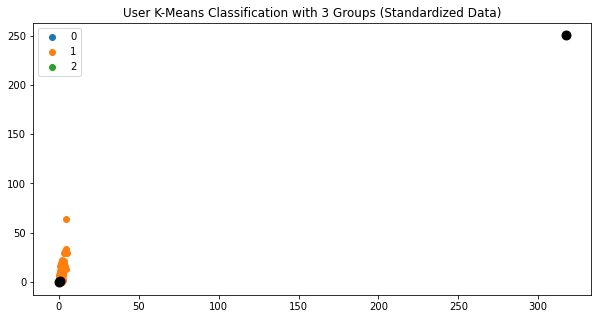

In [25]:
standardized_df = std_df.copy(deep=True)
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
label = kmeans.fit_predict(standardized_df)
centroids = kmeans.cluster_centers_
print(f'# Centroids of the clustering:\n{centroids}')
print(f'# The number of iterations required to converge: {kmeans.inertia_}')
print(f'# The number of iterations required to converge: {kmeans.n_iter_}')
#Getting index based on clusters
u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(10,5))
plt.title('User K-Means Classification with 3 Groups (Standardized Data)')
for i in u_labels:
    plt.scatter(standardized_df[label == i].iloc[:,0] , standardized_df[label == i].iloc[:,1], marker='o', label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

## computing the min, max, avg for each cluster above

In [26]:
cluster_map_standardized = pd.DataFrame()
cluster_map_standardized['data_index'] = standardized_df.index.values
cluster_map_standardized['cluster'] = kmeans.labels_

In [27]:
standardized_cluster_1 = cluster_map_standardized[cluster_map_standardized.cluster == 0].iloc[:,0].values.tolist()
cluster_1_df = standardized_df.loc[standardized_cluster_1,:]

standardized_cluster_2 = cluster_map_standardized[cluster_map_standardized.cluster == 1].iloc[:,0].values.tolist()
cluster_2_df = standardized_df.loc[standardized_cluster_2,:]

standardized_cluster_3 = cluster_map_standardized[cluster_map_standardized.cluster == 2].iloc[:,0].values.tolist()
cluster_3_df = standardized_df.loc[standardized_cluster_3,:]

In [28]:
cluster_1_df


,Bearer Id,Total Duration (hr),Total Data (MegaBytes)
MSISDN/Number,,,
33601001722.00,-0.12,-0.10,0.11
33601001754.00,-0.12,0.12,-0.32
33601002511.00,-0.12,-0.04,-0.06
33601007832.00,-0.12,-0.33,-0.16
33601008617.00,0.18,-0.38,0.45
...,...,...,...
33789967113.00,-0.12,0.05,-0.29
33789980299.00,0.18,0.22,0.23
33789996170.00,-0.12,-0.48,0.01


In [29]:
#Separate the indexes and using them select rows from the starting main dataframe containing the initial metrics grouped by the MSISDN Number
cluster_1_index = cluster_1_df.index.values.tolist()
cluster_2_index = cluster_2_df.index.values.tolist()
cluster_3_index = cluster_3_df.index.values.tolist()
cluster_1_index[:5]

[33601001722.0, 33601001754.0, 33601002511.0, 33601007832.0, 33601008617.0]

In [30]:
#selecting the values using the indexes
cluster_1_adf = df.loc[cluster_1_index,:]
cluster_2_adf = df.loc[cluster_2_index,:]
cluster_3_adf = df.loc[cluster_3_index,:]
cluster_1_adf.head()

,Bearer Id,Total Duration (hr),Total Data (MegaBytes)
MSISDN/Number,,,
33601001722.00,1,32.42,878.69
33601001754.00,1,50.34,156.86
33601002511.00,1,37.49,595.97
33601007832.00,1,13.86,422.32
33601008617.00,2,10.31,1457.41


In [31]:
# calculating the minimum, maximum, average & total values for each column
cluster_1_explorer = DataInfo(cluster_1_adf)
cluster_1_explorer.get_column_dispersion_with_total_params()

,Bearer Id,Total Duration (hr),Total Data (MegaBytes)
count,97673.00,97673.00,97673.00
mean,1.22,31.42,602.09
std,0.45,19.51,340.57
min,1.00,1.98,33.25
25%,1.00,17.37,335.85
50%,1.00,26.22,580.13
75%,1.00,44.22,806.08
max,4.00,119.02,2762.55
Mode,1.00,24.00,92.39
Median,1.00,26.22,580.13


In [32]:
cluster_2_explorer = DataInfo(cluster_2_adf)
cluster_2_explorer.get_column_dispersion_with_total_params()

,Bearer Id,Total Duration (hr),Total Data (MegaBytes)
count,9182.00,9182.00,9182.00
mean,3.20,138.28,1636.38
std,1.35,129.24,771.10
min,1.00,24.99,57.14
25%,2.00,93.59,1116.72
50%,3.00,111.72,1554.97
75%,4.00,140.56,2048.63
max,18.00,5153.82,8846.23
Mode,3.00,72.00,57.14
Median,3.00,111.72,1554.97


In [33]:
cluster_3_explorer = DataInfo(cluster_3_adf)
cluster_3_explorer.get_column_dispersion_with_total_params()

""
count
mean
std
min
25%
50%
75%
max
Mode
Median


In [34]:
unstandardized_df = df.copy(deep=True)

# Centroids of the clustering:
	[[1.44107659e+00 4.00182761e+01 8.63533445e+02]
 [1.06361461e+00 3.02306539e+01 3.45768148e+02]
 [3.48041912e+00 1.17249461e+02 2.03156448e+03]]
# The number of iterations required to converge: 287350313804.8616
# The number of iterations required to converge: 11


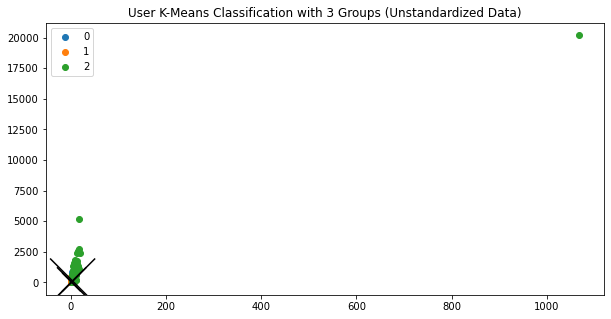

In [35]:
km = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
label = km.fit_predict(unstandardized_df)
centroids = km.cluster_centers_
print(f'# Centroids of the clustering:\n\t{centroids}')
print(f'# The number of iterations required to converge: {km.inertia_}')
print(f'# The number of iterations required to converge: {km.n_iter_}')
#Getting index based on clusters
u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(10,5))
plt.title('User K-Means Classification with 3 Groups (Unstandardized Data)')
for i in u_labels:
    plt.scatter(unstandardized_df[label == i].iloc[:,0] , unstandardized_df[label == i].iloc[:,1], marker='o', label = i)
plt.scatter(centroids[:,0] , centroids[:,1],centroids[:,2], marker='x', color = 'black')
plt.legend()
plt.show()


# Top 10 users by Engagement interms of App

In [36]:
df_agg = pd.read_csv('../data/Cleaner_telecom.csv')

# YOUTUBE

In [37]:
df_agg.sort_values(by=['Youtube_Total_Data'],ascending=False, inplace=True)
top10 = df_agg[['MSISDN/Number', 'Youtube_Total_Data']].head(10)
top10.to_csv("../data/top10_youtube_users.csv",index=False)
top10

,MSISDN/Number,Youtube_Total_Data
66493,33667622755.00,45.19
102091,33769453473.00,45.18
15638,33629990004.00,45.17
45398,33661737653.00,45.11
13805,33626729518.00,45.09
68228,33668160078.00,45.09
95150,33761478919.00,45.07
54943,33664037764.00,45.07
18366,33636506509.00,45.05
53530,33663677874.00,45.04


# Google

In [38]:
df_agg.sort_values(by=['Google_Total_Data'],ascending=False, inplace=True)
top10 = df_agg[['MSISDN/Number', 'Youtube_Total_Data']].head(10)
top10.to_csv("../data/top10_youtube_users.csv",index=False)
top10

,MSISDN/Number,Youtube_Total_Data
92913,33760532824.00,15.64
48780,33662492962.00,9.66
80821,33684824997.00,12.69
27384,33651128952.00,34.44
3297,33609932989.00,16.28
53075,33663561775.00,11.66
82610,33688408549.00,24.80
90229,33699974451.00,31.13
16844,33632638205.00,31.65
74104,33671537508.00,16.27


# Email

In [39]:
df_agg.sort_values(by=['Email_Total_Data'],ascending=False, inplace=True)
top10r=df_agg[['MSISDN/Number', 'Email_Total_Data']].head(10)
top10.to_csv("../data/top10_email_users.csv",index=False)
top10

,MSISDN/Number,Youtube_Total_Data
92913,33760532824.00,15.64
48780,33662492962.00,9.66
80821,33684824997.00,12.69
27384,33651128952.00,34.44
3297,33609932989.00,16.28
53075,33663561775.00,11.66
82610,33688408549.00,24.80
90229,33699974451.00,31.13
16844,33632638205.00,31.65
74104,33671537508.00,16.27


# Social media

In [40]:
df_agg.sort_values(by=['Email_Total_Data'],ascending=False, inplace=True)
top10=df_agg[['MSISDN/Number', 'Email_Total_Data']].head(10)
top10.to_csv("../data/top10_email_users.csv",index=False)
top10

,MSISDN/Number,Email_Total_Data
43873,33661372513.00,4.52
88190,33699347344.00,4.51
14756,33628430878.00,4.51
57130,33664683534.00,4.51
28657,33652665765.00,4.51
103717,33781028402.00,4.51
79122,33681422676.00,4.51
44304,33661466191.00,4.50
100124,33763634053.00,4.50
38551,33660086322.00,4.50


# Game

In [41]:
df_agg.sort_values(by=['Gaming_Total_Data'],ascending=False, inplace=True)
top10=df_agg[['MSISDN/Number', 'Gaming_Total_Data']].head(10)
top10.to_csv("../data/top10_gameApp_users.csv",index=False)
top10

,MSISDN/Number,Gaming_Total_Data
82105,33687404535.00,859.20
76363,33675877202.00,859.01
2886,33609234453.00,858.90
44290,33661463178.00,858.74
66388,33667589199.00,858.65
11706,33623352766.00,858.56
28398,33652293629.00,858.51
71916,33669377899.00,858.37
28019,33651817347.00,858.20
46343,33661939094.00,858.15


# other

In [42]:
df_agg.sort_values(by=['Other_Total_Data'],ascending=False, inplace=True)
top10_other_user=df_agg[['MSISDN/Number', 'Other_Total_Data']].head(10)
top10_other_user.to_csv("../data/top10_otherAct_users.csv",index=False)
top10

,MSISDN/Number,Gaming_Total_Data
82105,33687404535.00,859.20
76363,33675877202.00,859.01
2886,33609234453.00,858.90
44290,33661463178.00,858.74
66388,33667589199.00,858.65
11706,33623352766.00,858.56
28398,33652293629.00,858.51
71916,33669377899.00,858.37
28019,33651817347.00,858.20
46343,33661939094.00,858.15


# Top used applications

In [43]:
alll = df_agg[['Youtube_Total_Data','Google_Total_Data','Email_Total_Data',
                'Social_Media_Total_Data','Netflix_Total_Data','Gaming_Total_Data', 'Other_Total_Data']]
sum_column = alll.sum(axis=0)

In [45]:
#top used are gaming, other and netflix as shown below
df_alll = pd.DataFrame({'Application':sum_column.index, 'Total Data used':sum_column.values})
df_alll.sort_values(by=['Total Data used'],ascending=False, inplace=True)
df_alll = df_alll.head(4)
df_alll

,Application,Total Data used
5,Gaming_Total_Data,46021732.98
6,Other_Total_Data,45817979.22
4,Netflix_Total_Data,2419100.35
0,Youtube_Total_Data,2416475.38


# k-means optimized (elbow method) clustering of users based on metrics

In [46]:
#finding optimum k value
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}
# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(standardized_df)
    sse.append(kmeans.inertia_)

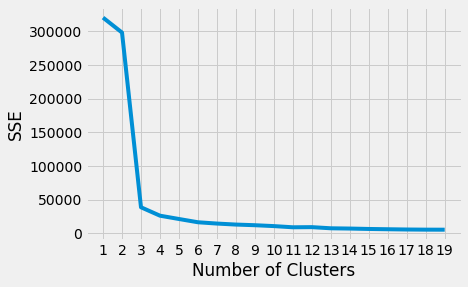

In [47]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [48]:
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
kl.elbow

3

# Centroids of the clustering:
[[-5.36168204e-02 -1.16790128e-01 -5.54290163e-02]
 [ 5.32466655e-01  1.20759017e+00  5.52103134e-01]
 [ 3.17330536e+02  2.50281472e+02  3.12915659e+02]]
# The number of iterations required to converge: 38501.49030874374
# The number of iterations required to converge: 32


<ipython-input-49-2e1526b46985>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


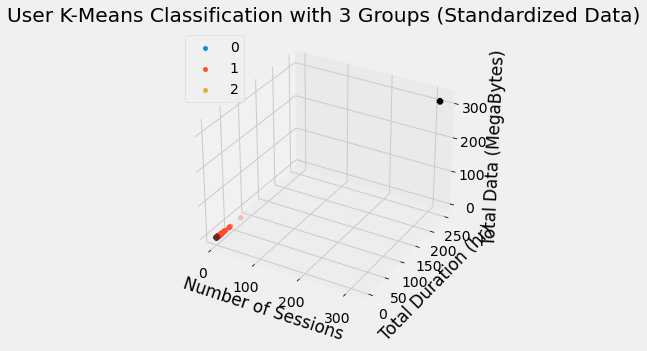

In [49]:
kmeans = KMeans(init="random",n_clusters=kl.elbow,n_init=10,max_iter=300,random_state=42)
label = kmeans.fit_predict(standardized_df)
centroids = kmeans.cluster_centers_
print(f'# Centroids of the clustering:\n{centroids}')
print(f'# The number of iterations required to converge: {kmeans.inertia_}')
print(f'# The number of iterations required to converge: {kmeans.n_iter_}')
#Getting index based on clusters
u_labels = np.unique(label)
 
#plotting the results:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
plt.title(f'User K-Means Classification with {kl.elbow} Groups (Standardized Data)')
ax.set_xlabel('Number of Sessions')
ax.set_ylabel('Total Duration (hr)')
ax.set_zlabel('Total Data (MegaBytes)')
for i in u_labels:
    ax.scatter(standardized_df[label == i].iloc[:,0] , standardized_df[label == i].iloc[:,1],standardized_df[label == i].iloc[:,2], marker='o', label = i)
ax.scatter(centroids[:,0] , centroids[:,1],centroids[:,2], marker='x', color = 'black')
ax.legend()
fig.show()
fig.savefig('../data/engagement_cluster.png')

In [51]:
standardized_df['cluster'] = label
cleaner = DataCleaner(standardized_df)
cleaner.save_clean_data('../data/engagement_cluster.csv')